The Original Datasethere

https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

In [ ]:
#pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

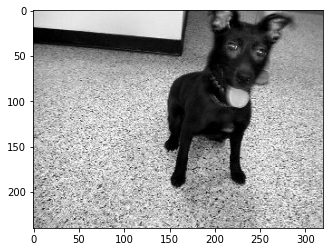

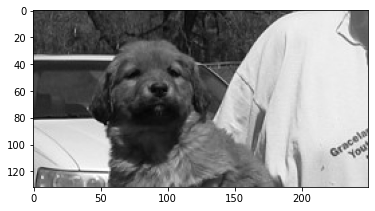

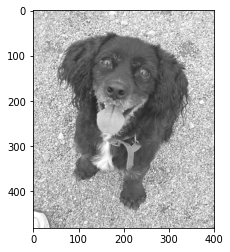

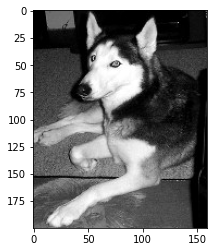

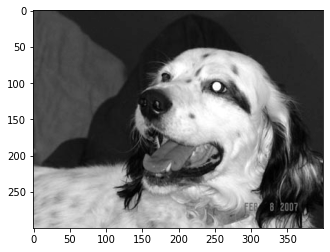

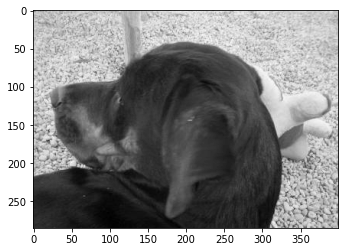

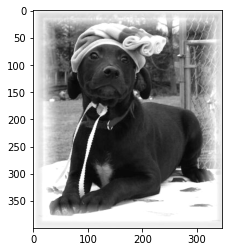

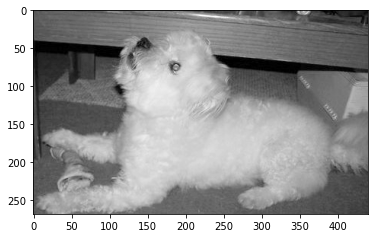

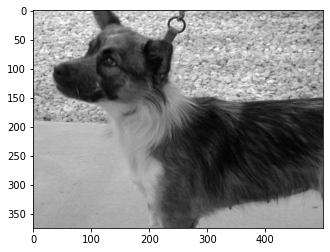

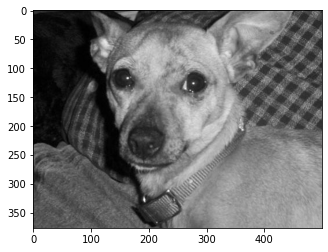

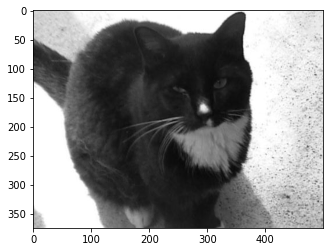

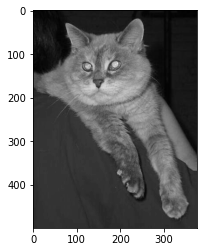

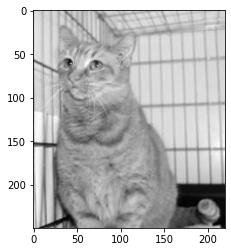

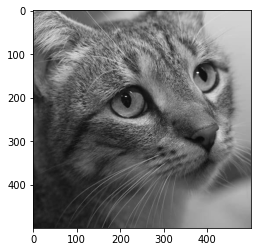

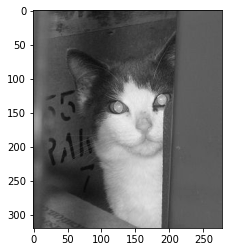

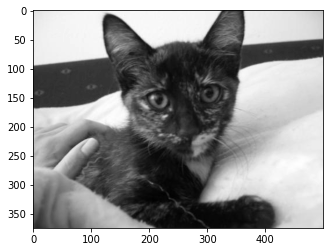

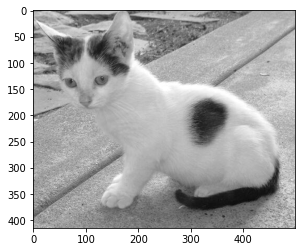

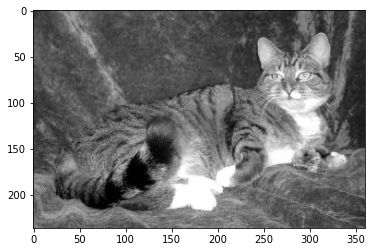

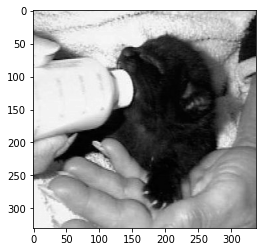

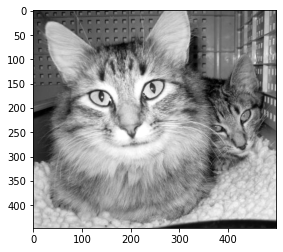

In [21]:
DATADIR = 'PetImages'
CATEGORIES = ["Dog", "Cat"]
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    x=0
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        x+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        if x==10 : 
            break        

In [22]:
print(img_array)
print(img_array.shape)

[[ 51  50  50 ...  88  85  94]
 [ 51  50  49 ...  86  83  92]
 [ 52  50  48 ...  86  84  93]
 ...
 [202 208 211 ...  17  20  22]
 [195 202 207 ...  26  29  32]
 [186 195 201 ...  30  34  38]]
(447, 500)


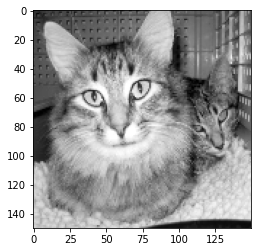

In [23]:
#IMG_SIZE = 5
#IMG_SIZE = 10
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [24]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
           

create_training_data()

print(len(training_data))

100%|██████████| 500/500 [00:00<00:00, 755.02it/s]

999


In [25]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
1
1
0
1
0
1


In [26]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE)

[[[[ 60]
   [ 44]
   [ 38]
   ...
   [227]
   [227]
   [222]]

  [[ 58]
   [ 59]
   [ 48]
   ...
   [225]
   [227]
   [227]]

  [[ 55]
   [ 48]
   [ 48]
   ...
   [223]
   [216]
   [212]]

  ...

  [[236]
   [234]
   [226]
   ...
   [237]
   [227]
   [228]]

  [[210]
   [210]
   [215]
   ...
   [233]
   [227]
   [219]]

  [[224]
   [223]
   [228]
   ...
   [213]
   [215]
   [218]]]]


In [10]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
 
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [28]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
#IMG_SIZE = 150
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

y = np.array(y)

history = model.fit(X, y, batch_size=32, epochs=40, validation_split=0.1)

Epoch 1/40
29/29 [==============================] - 2s 31ms/step - loss: 0.7150 - accuracy: 0.4894 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/40
29/29 [==============================] - 1s 26ms/step - loss: 0.6964 - accuracy: 0.5417 - val_loss: 0.6958 - val_accuracy: 0.5000
Epoch 3/40
29/29 [==============================] - 1s 26ms/step - loss: 0.6949 - accuracy: 0.5061 - val_loss: 0.7046 - val_accuracy: 0.5000
Epoch 4/40
29/29 [==============================] - 1s 28ms/step - loss: 0.7032 - accuracy: 0.4961 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 5/40
29/29 [==============================] - 1s 41ms/step - loss: 0.7022 - accuracy: 0.4816 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/40
29/29 [==============================] - 1s 27ms/step - loss: 0.6998 - accuracy: 0.5095 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 7/40
29/29 [==============================] - 1s 27ms/step - loss: 0.7006 - accuracy: 0.4950 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 8/40
29

In [31]:
test_loss, test_acc = model.evaluate(X,y)
test_acc

32/32 [==============================] - 0s 8ms/step - loss: 0.6972 - accuracy: 0.5005


0.500500500202179